<a href="https://colab.research.google.com/github/PS0099/Machine-learing--Supervised-ML-/blob/main/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

In [135]:
d=pd.read_csv('/content/train_v9rqX0R.csv')

In [136]:
d.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [137]:
d.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [138]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [139]:
d.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [140]:
d['Item_Weight']=d['Item_Weight'].fillna(d['Item_Weight'].mean())

In [141]:
d['Outlet_Size']=d['Outlet_Size'].fillna(d['Outlet_Size'].mode()[0])

In [142]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [143]:
data=d.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [144]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [146]:

data['Item_Fat_Content']=LE.fit_transform(data['Item_Fat_Content'])
data['Item_Type']=LE.fit_transform(data['Item_Type'])

data['Outlet_Size']=LE.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']=LE.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']=LE.fit_transform(data['Outlet_Type'])

In [147]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052


<Axes: xlabel='Item_Weight', ylabel='Count'>

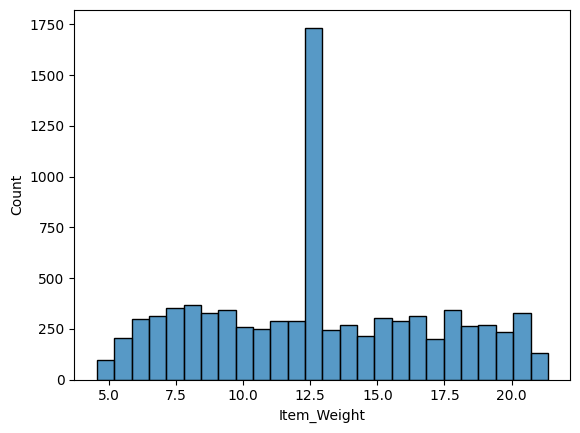

In [148]:
snr.histplot(data['Item_Weight'])

<Axes: xlabel='Item_Fat_Content', ylabel='Count'>

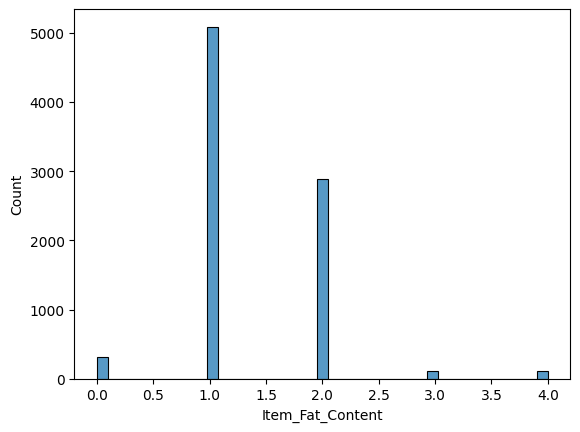

In [149]:
snr.histplot(data['Item_Fat_Content'])

<Axes: xlabel='Item_Visibility', ylabel='Count'>

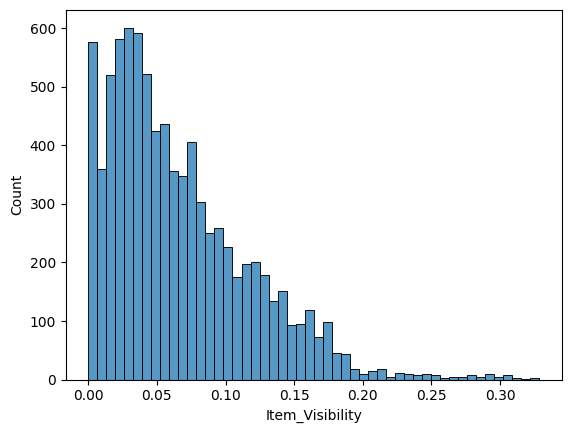

In [150]:
snr.histplot(data['Item_Visibility'])

<Axes: xlabel='Item_MRP', ylabel='Count'>

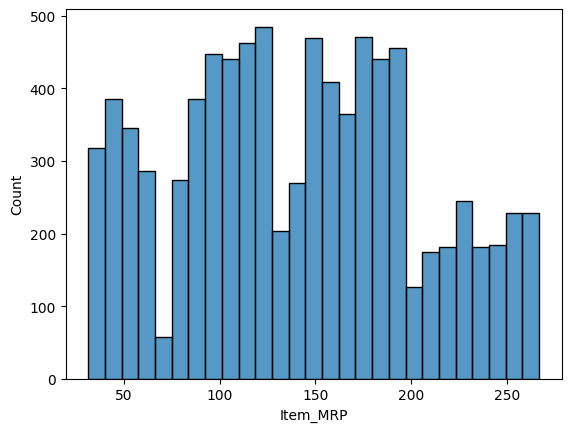

In [151]:
snr.histplot(data['Item_MRP'])

In [152]:
snr.histplot(data['Outlet_Identifier'])

KeyError: ignored

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Count'>

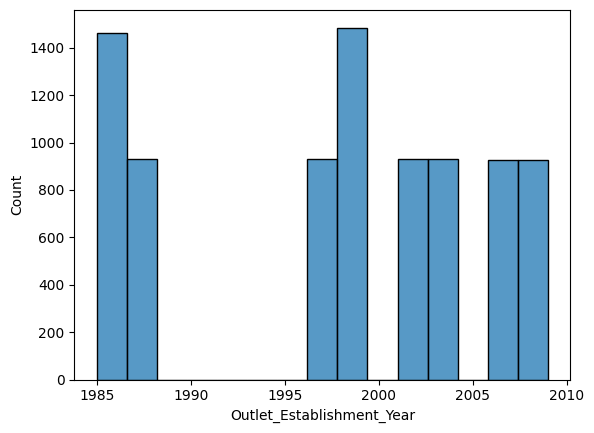

In [153]:
snr.histplot(data['Outlet_Establishment_Year'])

<Axes: xlabel='Outlet_Location_Type', ylabel='Count'>

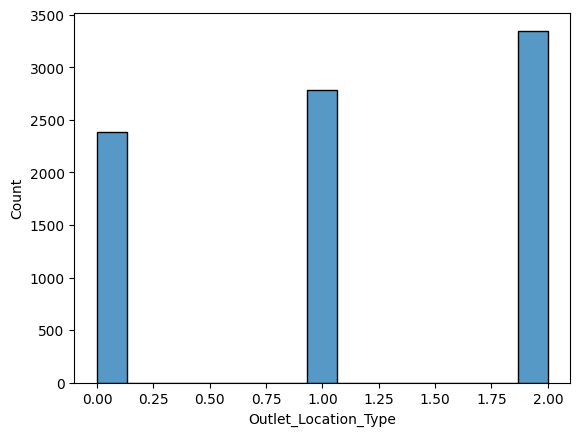

In [154]:
snr.histplot(data['Outlet_Location_Type'])

<Axes: xlabel='Outlet_Type', ylabel='Count'>

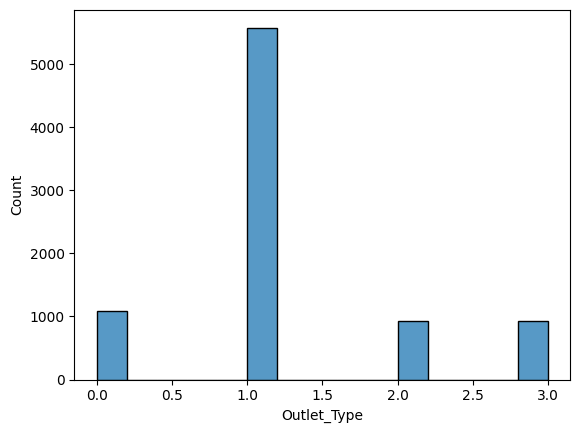

In [155]:
snr.histplot(data['Outlet_Type'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

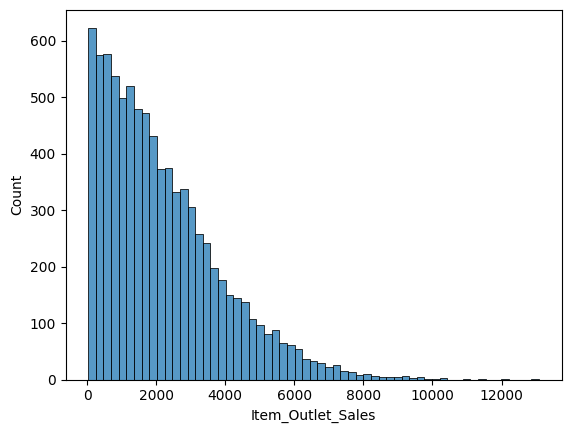

In [156]:
snr.histplot(data['Item_Outlet_Sales'])

In [157]:
x=data.drop(['Item_Outlet_Sales'],axis=1)
y=data['Item_Outlet_Sales']

In [158]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [159]:
from sklearn.ensemble import RandomForestRegressor
RR=RandomForestRegressor()

In [160]:
RR.fit(x_train,y_train)

RandomForestRegressor()

In [161]:
prediction=RR.predict(x_test)

In [162]:
prediction

array([2741.051994, 2575.587378, 3653.437682, ..., 1313.397028,
        203.33532 ,  286.600268])

In [163]:
RR.score(x,y)

0.85933463947558

In [164]:
nn=pd.read_csv('/content/test_AbJTz2l.csv')

In [165]:
nn.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [166]:
nn.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [167]:
nn['Item_Weight']=nn['Item_Weight'].fillna(nn['Item_Weight'].mean())

In [168]:
nn['Outlet_Size']=nn['Outlet_Size'].fillna(nn['Outlet_Size'].mode()[0])

In [169]:
nn.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [170]:
test_file=nn.drop(['Item_Identifier','Outlet_Identifier'],axis=1)


In [171]:
test_file.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [172]:

test_file['Item_Fat_Content']=LE.fit_transform(test_file['Item_Fat_Content'])
test_file['Item_Type']=LE.fit_transform(test_file['Item_Type'])
test_file['Outlet_Size']=LE.fit_transform(test_file['Outlet_Size'])
test_file['Outlet_Location_Type']=LE.fit_transform(test_file['Outlet_Location_Type'])
test_file['Outlet_Type']=LE.fit_transform(test_file['Outlet_Type'])

In [173]:
test_file.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,1,0.007565,13,107.8622,1999,1,0,1
1,8.300000,4,0.038428,4,87.3198,2007,1,1,1
2,14.600000,1,0.099575,11,241.7538,1998,1,2,0
3,7.315000,1,0.015388,13,155.0340,2007,1,1,1
4,12.695633,2,0.118599,4,234.2300,1985,1,2,3


In [174]:
New_prediction=RR.predict(test_file)

In [176]:
nn['Item_Identifier']

0       FDW58
1       FDW14
2       NCN55
3       FDQ58
4       FDY38
        ...  
5676    FDB58
5677    FDD47
5678    NCO17
5679    FDJ26
5680    FDU37
Name: Item_Identifier, Length: 5681, dtype: object

In [177]:
nn['Outlet_Identifier']

0       OUT049
1       OUT017
2       OUT010
3       OUT017
4       OUT027
         ...  
5676    OUT046
5677    OUT018
5678    OUT045
5679    OUT017
5680    OUT045
Name: Outlet_Identifier, Length: 5681, dtype: object

In [178]:
New_prediction

array([1563.125292, 1096.319596,  655.61326 , ..., 1861.729934,
       4640.040096, 1636.130262])

In [179]:
prediction_df_N = pd.DataFrame({'Item_Identifier': nn['Item_Identifier'],'Outlet_Identifier':nn['Outlet_Identifier'],'Predicted Price': New_prediction})


In [180]:
prediction_df_N

,Item_Identifier,Outlet_Identifier,Predicted Price
0,FDW58,OUT049,1563.125292
1,FDW14,OUT017,1096.319596
2,NCN55,OUT010,655.613260
3,FDQ58,OUT017,2642.560200
4,FDY38,OUT027,5637.361890
...,...,...,...
5676,FDB58,OUT046,2371.779340
5677,FDD47,OUT018,2636.694502
5678,NCO17,OUT045,1861.729934
5679,FDJ26,OUT017,4640.040096


In [182]:
prediction_df_N.to_excel('prediction_N.xlsx')